<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/02-Prep-Datos-Metricas-Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Preparación de Datos y Métricas de Evaluación
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Evelyn Oña &bull; Fecha 07/12/2025
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller veremos como aplicar diferentes técnicas para la carga y preparación de datos y las métricas de modelos.
   
Para eso necesitaremos las siguientes librerías:

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, recall_score, f1_score



---
## <font color='264CC7'> Lectura de Datos </font>


Primero, necesitas cargar el conjunto de datos "Boston house prices", que contiene información sobre el valor de las casas en diferentes áreas de Boston basado en múltiples factores. Este conjunto de datos está disponible para su descarga [aquí](https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/refs/heads/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data); la descripción de las variables  de puede encontrar [aquí](https://github.com/rupakc/UCI-Data-Analysis/blob/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.names).

En los ejercicios de esta actividad, usaremos como variable objetivo para regresión "MEDV", que representa la mediana del valor de las casas en una zona de Boston (en miles de dólares, k$); y para clasificación, la variable "CHAS", que indica si la casa está cerca del río Charles (1) o no (0).

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos "boston house-prices dataset" y muestra:
<ul>
  <li>El número y nombre de los atributos.</li>
  <li>El número de filas del conjunto de datos.</li>
  <li>Verifica si hay "missing values" y en qué columnas.</li>
</ul>
</div>

In [3]:
url = "https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/refs/heads/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data"
column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS",
    "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

# Cargar dataset
df = pd.read_csv(url, delim_whitespace=True, header=None, names=column_names)


/tmp/ipython-input-136509738.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, header=None, names=column_names)


In [5]:
#Numero y nombres de atributos
print("Número de atributos:", len(df.columns))
print("\nNombres de los atributos:")
print(df.columns.tolist())
#Numero de filas
print("\nNúmero de filas del dataset:", df.shape[0])

Número de atributos: 14

Nombres de los atributos:
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

Número de filas del dataset: 506


In [6]:
#Verificar Missing Values

print("\nMissing values por columna:")
print(df.isnull().sum())


Missing values por columna:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


---
## <font color='264CC7'> Análisis de los datos </font>

### <font color='264CC7'> Análisis estadístico básico </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un análisis estadístico básico:
<br>

<ul>
  <li>Variables categóricas:</li>
     <ul>
      <li>Calcula la frecuencia.</li>
      <li>Realiza un gráfico de barras.</li>
    </ul>
  <li>Variables numéricas:</li>
    <ul>
      <li>Calcula estadísticos descriptivos básicos como media, mediana, desviación estándar, entre otros.</li>
      <li>Realiza un histograma para las variables INDUS, AGE y MEDV.</li>
    </ul>
</ul>
    
<hr>
Sugerencia: Puedes usar la librería 'pandas' y sus funciones 'describe' y 'value_counts', así como las funciones 'bar' e 'hist' de matplotlib.
</div>


Frecuencia de CHAS:
CHAS
0    471
1     35
Name: count, dtype: int64


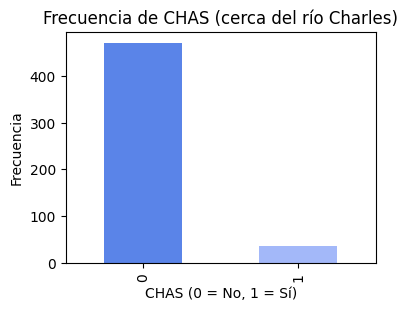

In [8]:
#Variable categórica

print("Frecuencia de CHAS:")
print(df["CHAS"].value_counts())

# Gráfico de barras CHAS
plt.figure(figsize=(4,3))
df["CHAS"].value_counts().plot(kind='bar', color=['#5A84E8', '#A3B8F9'])
plt.title("Frecuencia de CHAS (cerca del río Charles)")
plt.xlabel("CHAS (0 = No, 1 = Sí)")
plt.ylabel("Frecuencia")
plt.show()


Estadísticos descriptivos:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   

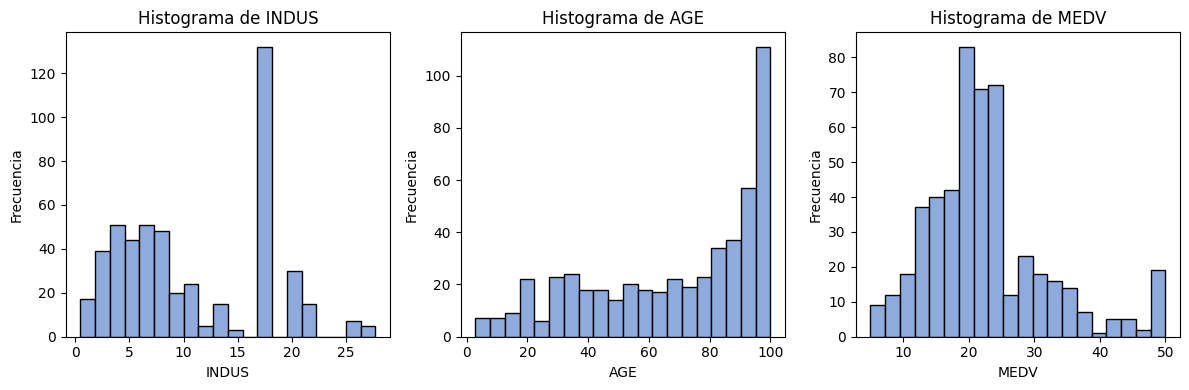

In [10]:
#Variables numéricas
print("\nEstadísticos descriptivos:")
print(df.describe())

#Histograma
variables = ["INDUS", "AGE", "MEDV"]

plt.figure(figsize=(12,4))
for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    plt.hist(df[var], bins=20, color="#8FAADC", edgecolor="black")
    plt.title(f"Histograma de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
Comenta los resultados.
</div>



**1.   Variable categórica: CHAS**

Las variables categóricas del conjunto de datos, en particular CHAS, muestran una distribución altamente desbalanceada. La categoría CHAS = 0 representa la gran mayoría de observaciones, mientras que CHAS = 1 aparece en un porcentaje muy reducido del total, lo que indica que solo una pequeña fracción de las viviendas se encuentra cerca del río Charles. Este desequilibrio es importante en tareas de clasificación, ya que los modelos pueden tender a favorecer la clase mayoritaria. El análisis gráfico mediante barras confirma este desbalance, evidenciando la predominancia de zonas no colindantes con el río.

**2.   Variables Numéricas**

En cuanto a las variables numéricas, los estadísticos descriptivos revelan una marcada heterogeneidad entre las diferentes zonas de Boston. Variables como CRIM, TAX y RAD presentan altos rangos y desviaciones estándar, lo que indica una gran variabilidad en criminalidad, carga tributaria y accesibilidad vial. La variable objetivo MEDV muestra una distribución asimétrica y un valor máximo truncado en 50, lo cual sugiere la presencia de un límite impuesto en el conjunto original. Los histogramas de INDUS, AGE y MEDV evidencian patrones importantes: zonas con diferentes niveles industriales, un predominio de viviendas antiguas y una concentración de valores medios de vivienda entre 15 y 30.




### <font color='264CC7'> Análisis exploratorio de los datos </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un gráfico del histograma de valores de la variable MEDV, separado por los posibles valores de CHAS. Para comparar mejor los valores de MEDV según las diferentes clases de CHAS, los histogramas deben estar sobrepuestos. Agrega una leyenda para identificar a qué clase corresponde cada histograma.
    
El objetivo es observar cómo se distribuye el valor de la respuesta MEDV en función de la clase CHAS, para identificar visualmente si este atributo categórico está relacionado con diferentes valores de la respuesta.
    
<hr>
Sugerencia: Usa la función "hist" de la librería "matplotlib", utilizando el parámetro "alpha" para que se aprecien los histogramas sobrepuestos.<br>
Sugerencia: Para una mejor comparación, considera representar la densidad de probabilidad en lugar del número de entradas por bin. Esto permite usar la misma escala para cada clase y facilita la comparación. Puedes usar el parámetro "density" de la misma función "hist".  
</div>

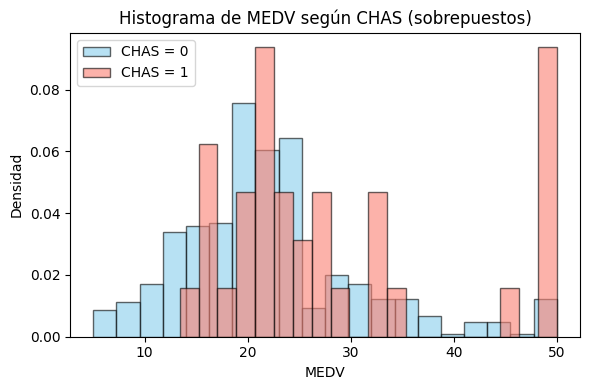

In [13]:
medv_chas0 = df[df["CHAS"] == 0]["MEDV"]
medv_chas1 = df[df["CHAS"] == 1]["MEDV"]
plt.figure(figsize=(6,4))

plt.hist(medv_chas0, bins=20, density=True, alpha=0.6,
         color="skyblue", edgecolor="black", label="CHAS = 0")

plt.hist(medv_chas1, bins=20, density=True, alpha=0.6,
         color="salmon", edgecolor="black", label="CHAS = 1")

plt.title("Histograma de MEDV según CHAS (sobrepuestos)")
plt.xlabel("MEDV")
plt.ylabel("Densidad")
plt.legend()
plt.tight_layout()
plt.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Mirando los histogramas, ¿te parece que el atributo CHAS tendrá algún peso a la hora de predecir la mediana del precio de las casas, MEDV? ¿Porqué?
</div>

Sí, el atributo CHAS parece tener cierto peso en la predicción de MEDV.
Aunque la clase CHAS = 1 tiene pocas observaciones, el histograma muestra que las viviendas cercanas al río Charles tienden a concentrarse en valores más altos de MEDV, mientras que las viviendas que no colindan con el río (CHAS = 0) presentan una distribución más dispersa y con mayor presencia de valores bajos y medios. Este patrón sugiere que estar cerca del río está asociado a precios de vivienda mayores, por lo que CHAS puede aportar información relevante al modelo. Sin embargo, debido al fuerte desbalance de clases, su influencia probablemente sea moderada, no dominante.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula y muestra la correlación entre todos los atributos numéricos y la variable respuesta MEDV.
</div>


In [14]:
corr_medv = df.corr(numeric_only=True)["MEDV"].sort_values(ascending=False)

print("Correlación de cada atributo con MEDV:\n")
print(corr_medv)

Correlación de cada atributo con MEDV:

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Representa gráficamente las relaciones entre todas las parejas de variables numéricas (sin incluir la variable respuesta) del conjunto de datos. El objetivo de este ejercicio es observar y analizar gráficamente las correlaciones entre las variables.
<hr>Sugerencia: Puedes usar la función "pairplot" de la librería 'seaborn'.
</div>


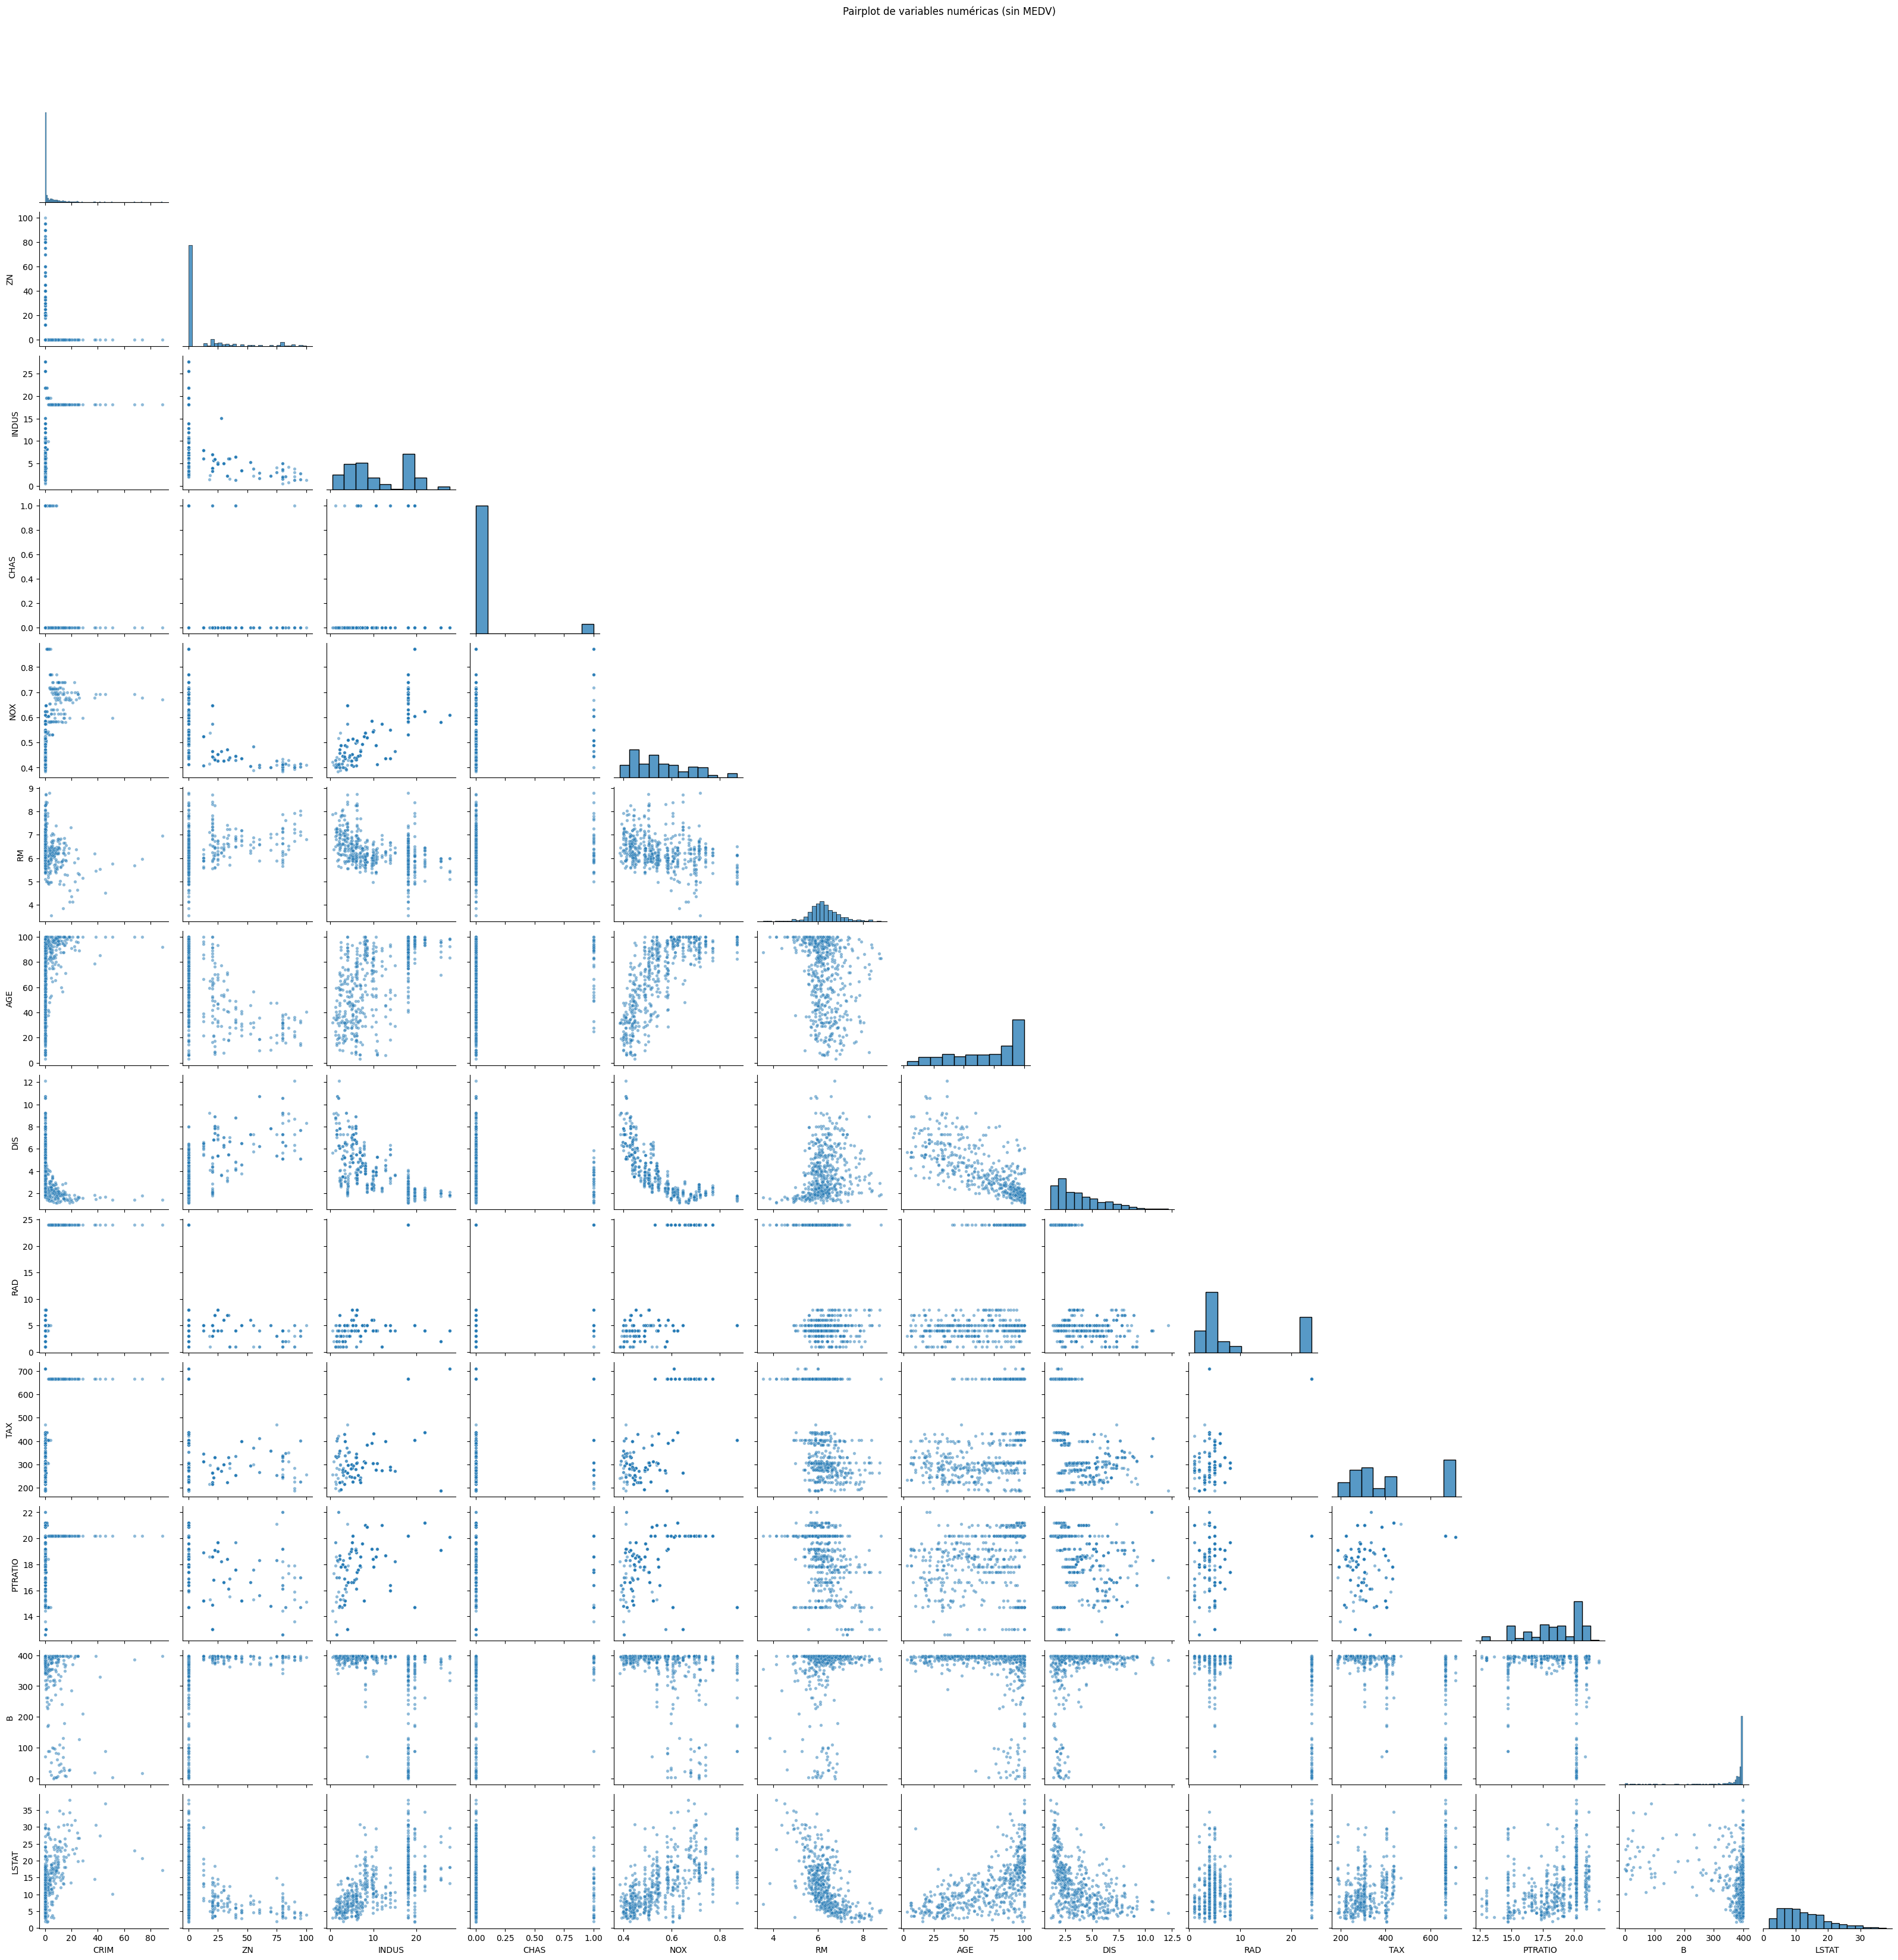

In [19]:
#Solo variables numéricas
numeric_vars = df.drop(columns=["MEDV"])
#Grafico
sns.pairplot(numeric_vars, corner=True, diag_kind="hist", plot_kws={'alpha':0.5, 's':15})
plt.suptitle("Pairplot de variables numéricas (sin MEDV)", y=1.02)
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Identifica los 2 atributos con la correlación más fuerte con la variable respuesta y los 2 con la correlación más débil (considerando el valor absoluto del coeficiente de correlación).
    
Para analizar las correlaciones gráficamente, representa, para cada uno de los 4 atributos identificados, un scatter plot con el atributo en el eje x y la respuesta en el eje y. Además, añade en cada gráfico una regresión lineal que ajuste los puntos.
        
<hr>Sugerencia: Puedes usar la función "regplot" de la librería 'seaborn'.
</div>


In [22]:
corr = df.corr(numeric_only=True)["MEDV"].drop("MEDV")
corr_abs = corr.abs().sort_values(ascending=False)
# Correlaciones fuertes
top2 = corr_abs.head(2)
# Correlaciones débiles
low2 = corr_abs.tail(2)

print("Dos correlaciones más fuertes:")
print(top2)

print("\nDos correlaciones más débiles:")
print(low2)

Dos correlaciones más fuertes:
LSTAT    0.737663
RM       0.695360
Name: MEDV, dtype: float64

Dos correlaciones más débiles:
DIS     0.249929
CHAS    0.175260
Name: MEDV, dtype: float64


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los gráficos, comenta brevemente si logras visualizar las correlaciones altas o bajas que identificaste numéricamente.
</div>


Al observar los scatter plots con regresión lineal, las correlaciones numéricamente más fuertes se reflejan claramente en los gráficos. En el caso de LSTAT, se aprecia una relación negativa muy marcada: a medida que aumenta el porcentaje de población con bajo estatus socioeconómico, el valor de las viviendas MEDV disminuye de forma casi lineal. De igual manera, para RM, la tendencia positiva es evidente: más habitaciones se asocian con valores de vivienda más altos, mostrando una nube de puntos ascendente y bien alineada con la recta de regresión.

Por otro lado, las correlaciones débiles como DIS y CHAS se visualizan como nubes de puntos más dispersas y sin una tendencia lineal clara. En DIS, aunque puede existir cierta forma, la relación es débil y los puntos no siguen una dirección definida. En CHAS, al ser una variable casi binaria y muy desbalanceada, los valores de MEDV se superponen ampliamente en ambas clases, lo que confirma visualmente la baja correlación.

---
## <font color='264CC7'> Reducción de la dimensionalidad </font>


En este ejercicio aplicaremos métodos de reducción de dimensionalidad al conjunto original de datos. El objetivo es reducir el número de atributos a un nuevo conjunto con menos dimensiones, pero que conserven la máxima información posible presente en los atributos originales.


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica el método de reducción de dimensionalidad Principal Component Analysis (PCA) para reducir a 2 dimensiones el dataset original que contiene todos los atributos.</li>
    <li>Genera un gráfico con el resultado del PCA, mostrando los valores de las dos componentes principales en los ejes x e y, y utilizando una escala de colores para representar el valor de la respuesta MEDV. El objetivo es visualizar cómo varía MEDV en función de las componentes principales generadas.</li>
</ul>
    
NOTA: Asegúrate de no incluir la variable objetivo "MEDV" en la reducción de dimensionalidad. Queremos explicar la variable objetivo en función del resto de variables reducidas a dos dimensiones.

<hr>
Sugerencia: No necesitas programar el algoritmo de PCA desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


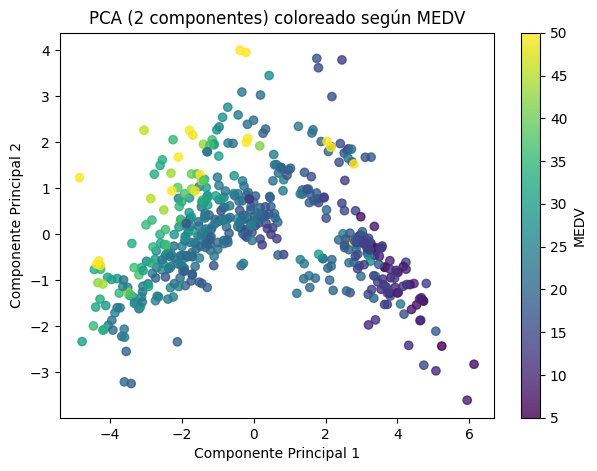

In [28]:
X = df.drop(columns=["MEDV"])
y = df["MEDV"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "MEDV": y
})

plt.figure(figsize=(7,5))
scatter = plt.scatter(
    pca_df["PC1"], pca_df["PC2"],
    c=pca_df["MEDV"],
    cmap="viridis",
    alpha=0.8
)

plt.colorbar(scatter, label="MEDV")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA (2 componentes) coloreado según MEDV")
plt.grid(False)
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica la reducción de dimensionalidad usando TSNE. Puedes encontrar más información sobre este algoritmo en el siguiente enlace: <a href="https://distill.pub/2016/misread-tsne">https://distill.pub/2016/misread-tsne/</a></li>
    <li>Al igual que antes, genera un gráfico con el resultado del TSNE, mostrando en los ejes x e y los valores de las 2 nuevas dimensiones, y utiliza una escala de colores para representar el valor de la respuesta MEDV.</li>
</ul>

<hr>
Sugerencia: No necesitas programar el algoritmo TSNE desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Además de especificar el número de componentes, experimenta con los parámetros "learning_rate" y "perplexity".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


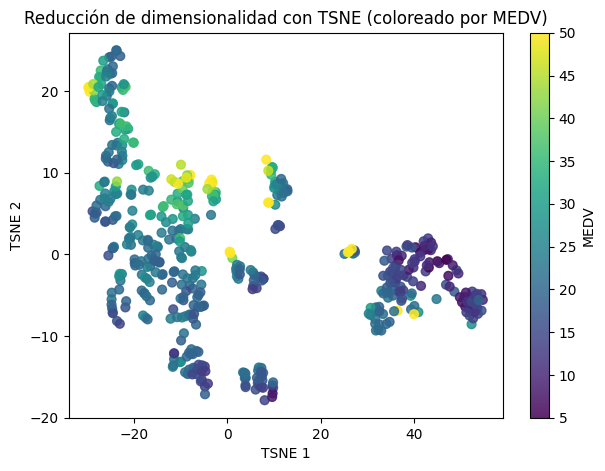

In [32]:
#Aplicar TNSE

tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    n_iter=1000,
    random_state=42
)

X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame({
    "TSNE1": X_tsne[:, 0],
    "TSNE2": X_tsne[:, 1],
    "MEDV": y
})

plt.figure(figsize=(7,5))

scatter = plt.scatter(
    tsne_df["TSNE1"], tsne_df["TSNE2"],
    c=tsne_df["MEDV"],
    cmap="viridis",
    alpha=0.85,
    s=40
)

plt.colorbar(scatter, label="MEDV")
plt.title("Reducción de dimensionalidad con TSNE (coloreado por MEDV)")
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.grid(False)
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los dos gráficos, ¿consideras que la reducción de dimensionalidad ha funcionado adecuadamente? ¿Crees que las 2 nuevas dimensiones logran explicar la variación de MEDV y permiten visualizar de manera diferenciada los precios altos y bajos? Si utilizáramos las 2 nuevas variables para predecir MEDV, ¿con cuál de los dos métodos de reducción de dimensionalidad (PCA o TSNE) obtendríamos mejores resultados?
    
¿Por qué crees que obtenemos resultados tan diferentes entre ambos métodos?
</div>


Comparando PCA y TSNE, se observa que PCA no separa claramente los valores altos y bajos de MEDV, ya que las dos primeras componentes capturan la varianza global, pero no la estructura que mejor explica el precio de las viviendas. En cambio, TSNE genera grupos más definidos donde los colores se agrupan de manera más clara, lo que indica que preserva mejor las relaciones locales relevantes para los precios.

Si usáramos solo las dos nuevas dimensiones para predecir MEDV, TSNE funcionaría mejor que PCA, aunque TSNE no está diseñado para modelos predictivos sino para visualización. Las diferencias entre ambos métodos se deben a que PCA es lineal y global, mientras TSNE es no lineal y se enfoca en conservar similitudes locales, produciendo estructuras más útiles para diferenciar precios altos y bajos.

---
## <font color='264CC7'> Entrenamiento y test </font>

En este último ejercicio se trata de aplicar un método de aprendizaje supervisado, concretamente el Linear Regression y K-means, para predecir las variables MEDV y CHAS, resectivamente, y evaluar la precisión obtenida con los modelo. Para eso usaremos:
<ul>
    <li>El conjunto de datos original con todos los atributos</li>
    <li>El conjunto de datos reducido a sólo 2 atributos con PCA</li>
</ul>

Divide los datos en dos conjuntos: uno para entrenamiento y otro para prueba y visualiza la dimensión de cada conjunto. Usar `random_state` igual al últmo número de tu cédula.

### <font color='264CC7'> Regresión </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo Linear Regression.</li>
    <li>Aplica validación cruzada con el modelo definido y el dataset de train (con cv=5 es suficiente).</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza R2 (coeficiente de determinación) y MAE (media del error absoluto) separadamente.</li>
    <li>Calcula la media y la desviación estándar del error obtenido en cada caso.</li>
</ul>
    
<hr>
Sugerencia: Para aplicar validación cruzada, utiliza 'cross_val_score' de sklearn y modifica su parámetro 'scoring' si es necesario.<br>
</div>


In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=9
)

print("Dimensiones del conjunto de entrenamiento:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nDimensiones del conjunto de prueba:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


Dimensiones del conjunto de entrenamiento:
X_train: (404, 13)
y_train: (404,)

Dimensiones del conjunto de prueba:
X_test: (102, 13)
y_test: (102,)


In [41]:
model = LinearRegression()
cv_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

# Validación cruzada — R2
print("\nRESULTADOS R2 (validación cruzada)")
print("Scores:", cv_r2)
print("Media:", np.mean(cv_r2))
print("Desviación estándar:", np.std(cv_r2))

# Validación cruzada — MAE
cv_mae_neg = cross_val_score(
    model, X_train, y_train,
    cv=5,
    scoring='neg_mean_absolute_error'
)

cv_mae = -cv_mae_neg   # convertir a valores positivos

print("\nRESULTADOS MAE (validación cruzada)")
print("Scores:", cv_mae)
print("Media:", np.mean(cv_mae))
print("Desviación estándar:", np.std(cv_mae))


RESULTADOS R2 (validación cruzada)
Scores: [0.79568497 0.67100488 0.73136383 0.66012813 0.67482307]
Media: 0.7066009783566818
Desviación estándar: 0.05096233948502228

RESULTADOS MAE (validación cruzada)
Scores: [2.76031182 3.43443644 2.69793823 4.48469522 3.32152847]
Media: 3.3397820347995206
Desviación estándar: 0.643096889236511


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

X_train, X_test, y_train, y_test = train_test_split(
    X_pca_df, y, test_size=0.2, random_state=9
)

print("Dimensiones del conjunto de entrenamiento:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nDimensiones del conjunto de prueba:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

model = LinearRegression()

# Validación cruzada — R2

cv_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

print("\nRESULTADOS R2 con PCA (validación cruzada)")
print("Scores:", cv_r2)
print("Media:", np.mean(cv_r2))
print("Desviación estándar:", np.std(cv_r2))

# Validación cruzada — MAE

cv_mae_neg = cross_val_score(
    model, X_train, y_train,
    cv=5,
    scoring='neg_mean_absolute_error'
)

cv_mae = -cv_mae_neg

print("\nRESULTADOS MAE con PCA (validación cruzada)")
print("Scores:", cv_mae)
print("Media:", np.mean(cv_mae))
print("Desviación estándar:", np.std(cv_mae))

Dimensiones del conjunto de entrenamiento:
X_train: (404, 2)
y_train: (404,)

Dimensiones del conjunto de prueba:
X_test: (102, 2)
y_test: (102,)

RESULTADOS R2 con PCA (validación cruzada)
Scores: [0.49508707 0.39316791 0.27585814 0.35415039 0.65020155]
Media: 0.433693009429446
Desviación estándar: 0.12924885630441607

RESULTADOS MAE con PCA (validación cruzada)
Scores: [4.50593079 5.24223423 4.70511664 6.02808746 3.59781107]
Media: 4.815836036049063
Desviación estándar: 0.8053885781000021


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Con qué datos ha funcionado mejor el modelo? ¿Tiene sentido el resultado? ¿Está alineado con los resultados observados en el ejercicio 3?
</div>


Los resultados muestran que el modelo de regresión lineal funciona significativamente mejor cuando se utilizan los datos originales con todas las variables. En este caso, el coeficiente de determinación alcanza aproximadamente $R^{2} \approx 0.70$, mientras que con el dataset reducido a dos componentes mediante PCA disminuye a $R^{2} \approx 0.43$. De igual manera, el error absoluto medio aumenta de alrededor de $3.34$ a $4.82$ tras aplicar la reducción de dimensionalidad, lo cual indica una pérdida importante de capacidad predictiva.

Este comportamiento es esperable, ya que la reducción de 13 atributos a solo 2 componentes implica descartar información relevante para explicar la variabilidad de la variable objetivo. Aunque el PCA conserva la máxima varianza posible, no está diseñado para preservar específicamente la información necesaria para predecir MEDV.

Además, los resultados son coherentes con el ejercicio 3, donde se observó que las dos componentes principales no lograban separar claramente los valores altos y bajos de la variable MEDV. Por tanto, es lógico que un modelo supervisado basado únicamente en estas dos dimensiones reduzca su desempeño.


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Con el mejor modelo que hayas obtenido:
    
<ul>
  <li>Genera predicciones sobre el dataset de test.</li>
  <li>Calcula la precisión de las predicciones obtenidas usando R2 (coeficiente de determinación) y MAE (media del error absoluto).</li>
</ul>

<hr>
Sugerencia: Para calcular R2 y MAE, utiliza las funciones disponibles en el módulo "metrics" de sklearn.
</div>


In [52]:
best_model = LinearRegression()
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

r2_test = r2_score(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)


print("RESULTADOS EN TEST")
print("R2 en test:", r2_test)
print("MAE en test:", mae_test)

RESULTADOS EN TEST
R2 en test: 0.49587309027276927
MAE en test: 5.223071470213745


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (R2 o MAE) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué?  
</div>


Para explicar la calidad del modelo a un ejecutivo de una inmobiliaria, la métrica más adecuada es el MAE, porque expresa el error promedio en las predicciones en las mismas unidades del negocio (miles de dólares). Es intuitivo y permite interpretar fácilmente cuánto puede equivocarse el modelo al estimar el valor de una vivienda. Si el MAE es, por ejemplo, 5.2, un ejecutivo entiende inmediatamente que el modelo se equivoca en promedio por 5.200 dólares, lo cual es mucho más útil para la toma de decisiones que un coeficiente abstracto.

### <font color='264CC7'> Clasificación </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo K-means.</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza la precisión, la sensibilidad y f1-score.</li>
</ul>



In [68]:
column_names = [
    "CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS",
    "RAD","TAX","PTRATIO","B","LSTAT","MEDV"
]

df = pd.read_csv(url, delim_whitespace=True, header=None, names=column_names)

df["CHAS"] = df["CHAS"].astype(int)

X = df.drop(columns=["CHAS"])
y = df["CHAS"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=9
)

kmeans = KMeans(n_clusters=2, random_state=9)
kmeans.fit(X_train)


train_clusters = kmeans.labels_

cluster_to_class = {}

for cluster in [0, 1]:
    mask = (train_clusters == cluster)
    majority_class = y_train[mask].mode()[0]
    cluster_to_class[cluster] = int(majority_class)

print("Mapa cluster → clase:", cluster_to_class)

test_clusters = kmeans.predict(X_test)
y_pred = np.array([cluster_to_class[c] for c in test_clusters])

# Métricas

accuracy = accuracy_score(y_test, y_pred)
sensibilidad = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\RESULTADOS")
print("Accuracy:", accuracy)
print("Sensibilidad (Recall):", sensibilidad)
print("F1-score:", f1)

Mapa cluster → clase: {0: 0, 1: 0}

========== RESULTADOS =============
Accuracy: 0.9215686274509803
Sensibilidad (Recall): 0.0
F1-score: 0.0


/tmp/ipython-input-1965782978.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, header=None, names=column_names)


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [70]:
column_names = [
    "CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS",
    "RAD","TAX","PTRATIO","B","LSTAT","MEDV"
]

df = pd.read_csv(url, delim_whitespace=True, header=None, names=column_names)


df["CHAS"] = df["CHAS"].astype(int)


# Separar características y etiqueta

X = df.drop(columns=["CHAS"])
y = df["CHAS"]


# Escalar antes de PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# PCA reducir a 2 dimensiones

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convertir a DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])


# División en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    X_pca_df, y, test_size=0.2, random_state=9
)

print("Dimensiones del conjunto de entrenamiento:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("\nDimensiones del conjunto de prueba:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


# Modelo K-means

kmeans = KMeans(n_clusters=2, random_state=9)
kmeans.fit(X_train)

train_clusters = kmeans.labels_


# Mapa cluster → clase

cluster_to_class = {}

for cluster in [0, 1]:
    mask = (train_clusters == cluster)
    if mask.sum() == 0:
        # evitar error si un clúster queda vacío (puede pasar con PCA)
        cluster_to_class[cluster] = 0
    else:
        cluster_to_class[cluster] = int(y_train[mask].mode()[0])

print("\nMapa cluster → clase:", cluster_to_class)


# Predicciones en test

test_clusters = kmeans.predict(X_test)
y_pred = np.array([cluster_to_class[c] for c in test_clusters])

# Métricas

accuracy = accuracy_score(y_test, y_pred)
sensibilidad = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print("RESULTADOS PCA + K-MEANS")
print("Accuracy:", accuracy)
print("Sensibilidad (Recall):", sensibilidad)
print("F1-score:", f1)

Dimensiones del conjunto de entrenamiento:
X_train: (404, 2)
y_train: (404,)

Dimensiones del conjunto de prueba:
X_test: (102, 2)
y_test: (102,)

Mapa cluster → clase: {0: 0, 1: 0}
RESULTADOS PCA + K-MEANS
Accuracy: 0.9215686274509803
Sensibilidad (Recall): 0.0
F1-score: 0.0


/tmp/ipython-input-1521600224.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, header=None, names=column_names)


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (precisión, sensibilidad o f1-score) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué? ¿El modelo es mejor discriminando o acertando? ¿Cómo se interpreta esto último?


Para un ejecutivo de una inmobiliaria, la métrica más adecuada es la precisión (accuracy), porque es fácil de entender y resume cuántas predicciones totales acierta el modelo. En cambio, para un analista matemático, la métrica más útil es la sensibilidad o el F1-score, ya que permiten evaluar qué tan bien identifica la clase minoritaria (CHAS = 1), que es lo realmente difícil y relevante desde el punto de vista técnico.

Los resultados muestran que el modelo tiene alta precisión, pero sensibilidad y F1 = 0, lo cual significa que solo está prediciendo la clase mayoritaria y no discrimina correctamente entre viviendas cercanas y no cercanas al río. En otras palabras, el modelo “acierta mucho” solo porque casi todas las viviendas pertenecen a la misma clase, pero no aprende ninguna estructura útil para distinguir entre ambas categorías.